# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

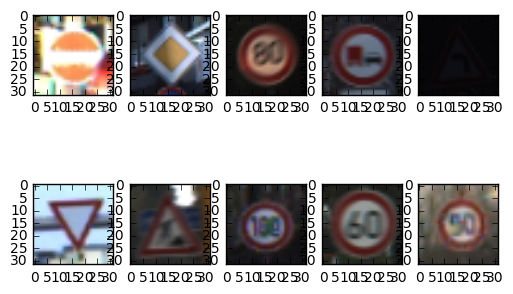

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

# display 10 random image to see what is in the training set
fig = plt.figure()
for i in range(10):
    index = random.randint(0,len(X_train))
    sp = fig.add_subplot(2,5,i+1)
    img = X_train[index] 
    sp.imshow(img)

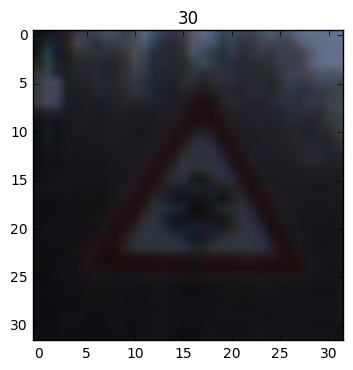

In [4]:
# look at one random sign with the label
pic_pos = random.randint(0,len(X_train))
img = X_train[pic_pos] 
plt.imshow(img)
plt.title(y_train[pic_pos])

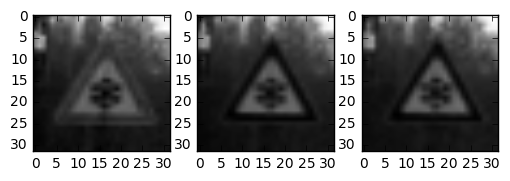

In [5]:
# display the image in one color channel (rgb)
r_img = img[:,:,0]
b_img = img[:,:,1]
g_img = img[:,:,2]
rgb_img = [r_img, b_img, g_img]
fig = plt.figure()
for i in range(len(rgb_img)):
    sp = fig.add_subplot(1,3,i+1)
    sp.imshow(rgb_img[i], cmap = "gray")

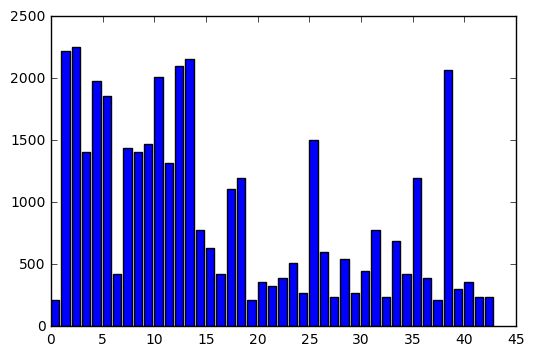

In [6]:
# display the distribution of the training set
bins, counts = np.unique(y_train, return_counts = True)
plt.bar(bins, counts)
plt.show()

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [7]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# Increase train set with new images (translation, rotation, scaling of original images)
import cv2

def new_image_set(X_train, y_train, new_img_num):
    new_train_X = []
    new_train_y = []
    for i in range(len(X_train)):
        new_train_X.append(X_train[i])
        new_train_y.append(y_train[i])
        for j in range(new_img_num):
            # random rotation of image -90 to 90 degree
            rotate = random.randint(-90,90)
            M = cv2.getRotationMatrix2D((image_shape[0]/2,image_shape[1]/2),rotate,1)
            rot_img = cv2.warpAffine(X_train[i],M,(image_shape[0],image_shape[1]))

            # random translation of image of x:(-2,2), y:(-2,2)
            t_x = random.randint(-2,2)
            t_y = random.randint(-2,2)
            trans = np.float32([[1,0,t_x],[0,1,t_y]])
            trans_img = cv2.warpAffine(rot_img,trans,(image_shape[0],image_shape[1]))
            
            # random shear of image shear_range from 0 - 10
            pts1 = np.float32([[5,5],[20,5],[5,20]])
            shear_range = random.randint(0,10)
            pt1 = 5 + shear_range*np.random.uniform()-shear_range/2
            pt2 = 20 + shear_range*np.random.uniform()-shear_range/2
            pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
            M = cv2.getAffineTransform(pts1,pts2)
            final_img = cv2.warpAffine(trans_img,M,(image_shape[0],image_shape[1]))
            
            # add image to new set
            new_train_X.append(trans_img)
            new_train_y.append(y_train[i])

    new_train_X = np.asarray(new_train_X)
    new_train_y = np.asarray(new_train_y)
    return new_train_X, new_train_y
            
# for every image 3 new images will be generated
new_img_num = 3
X_train, y_train = new_image_set(X_train, y_train, new_img_num)

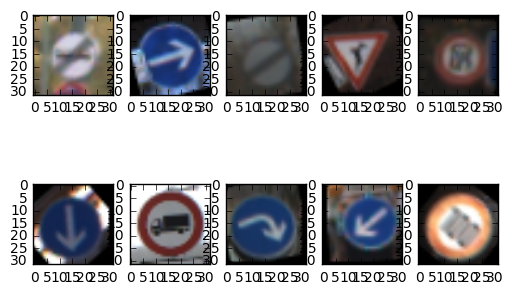

In [8]:
# display 10 random image from the new training set
fig = plt.figure()
for i in range(10):
    index = random.randint(0,len(X_train))
    sp = fig.add_subplot(2,5,i+1)
    img = X_train[index] 
    sp.imshow(img)

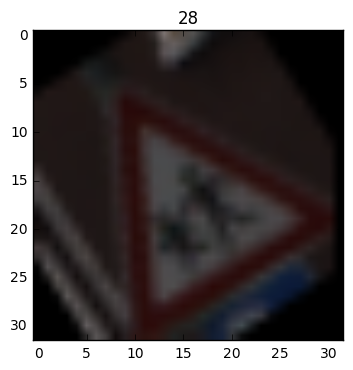

In [11]:
# match a random sign from new data with the label to ensure correct implementation
pic_pos = random.randint(0,len(X_train))
img = X_train[pic_pos] 
plt.imshow(img)
plt.title(y_train[pic_pos])

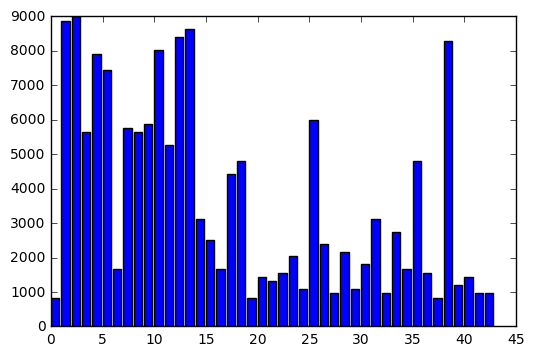

In [12]:
# display the distribution of the new training set
bins, counts = np.unique(y_train, return_counts = True)
plt.bar(bins, counts)
plt.show()

In [13]:
# Normalize data to -0.5 to 0.5 using min-max scaling
a = -0.5
b = 0.5
x_max = 255.0
x_min = 0.0
X_train_norm = a + (((X_train - x_min)*(b-a)) / (x_max - x_min))

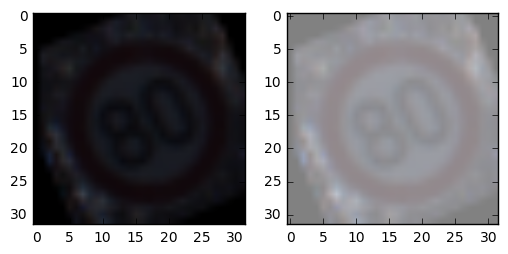

In [14]:
fig = plt.figure()
index = random.randint(0,len(X_train_norm))
image_list = [X_train[index], X_train_norm[index]]
for i in range(2):
    sp = fig.add_subplot(1,2,i+1)
    sp.imshow(image_list[i])
X_train = X_train_norm

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
Data augmentation and normalization were used to preprocess the data.

For Data augmentation, 3 additional images are created from the original image in the data set. The new images are created applying random translation, rotationa and shearing to the original image. The rationale behind this is to add training set that can potentially simulate real life example (identifiying the traffic sign from a different distance and angle). 

For normalization, the original images have the brigthness of 0 to 255 and the images are being normalizated by the min-max scaling equation to the value of -0.5 to 0.5. The goal of this technique is to reduce the influence of brightness variation on classifying the image.

In [15]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
# training set are currently sorted, need to shuffle the training set
X_train, y_train = shuffle(X_train, y_train)

# splitting training set into training 80% and validation 20%
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 50)


print ("Training size is", len(X_train))
print ("Validation size is", len(X_validation))
print ("Testing size is", len(X_test))

Training size is 125468
Validation size is 31368
Testing size is 12630


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

The training set is being seperated into 2 different subsets, 80 percent goes to training set and 20 percent goes to validation set. The testing set is left alone as the testing set should only be executed once when the model is trained. 

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

In [16]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def create_weight(in_shape):
    mu = 0
    sigma = 0.1 
    weights = tf.Variable(tf.truncated_normal(shape = in_shape, mean = mu, stddev = sigma))
    return weights

def create_bias(in_shape):
    bias =  tf.Variable(tf.zeros(in_shape))
    return bias

def CNN(x, keep_prob):
    # input will be a 32x32x3 image
    x = tf.reshape(x, [-1,32,32,3])
    
    # 1X1 convolution (isolate single color channel) input: 32x32x3 output: 32x32x3 
    conv1_1_w = create_weight((1,1,3,3))
    conv1_1_b = create_bias(3)
    conv1_1   = tf.nn.conv2d(x, conv1_1_w, strides = [1,1,1,1], padding = 'VALID') + conv1_1_b
 
    # 2 layers of 3X3 convolution (pattern after VGG) 2x2 max pooling and dropout
    # input 32x32x3 output 30x30x32
    conv2_1_w = create_weight((3,3,3,32))
    conv2_1_b = create_bias(32)
    conv2_1   = tf.nn.conv2d(conv1_1, conv2_1_w, strides = [1,1,1,1], padding = 'VALID') + conv2_1_b
    conv2_1   = tf.nn.relu(conv2_1)
    
    # input 30x30x32 output 28x28x32
    conv2_2_w = create_weight((3,3,32,32))
    conv2_2_b = create_bias(32)
    conv2_2   = tf.nn.conv2d(conv2_1, conv2_2_w, strides = [1,1,1,1], padding = 'VALID') + conv2_2_b
    conv2_2   = tf.nn.relu(conv2_2)
    
    # input 28x28x32 output 14x14x32
    max_pool1 = tf.nn.max_pool(conv2_2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    # dropout layer: only use when training
    max_pool1 = tf.nn.dropout(max_pool1,keep_prob)
    
    # 2 layers of 3X3 convolution (pattern after VGG) 2x2 max pooling and dropout
    # input 14x14x32 output 12x12x64
    conv3_1_w = create_weight((3,3,32,64))
    conv3_1_b = create_bias(64)
    conv3_1   = tf.nn.conv2d(max_pool1, conv3_1_w, strides = [1,1,1,1], padding = 'VALID') + conv3_1_b
    conv3_1   = tf.nn.relu(conv3_1)
    
    # input 12x12x64 output 10x10x64
    conv3_2_w = create_weight((3,3,64,64))
    conv3_2_b = create_bias(64)
    conv3_2   = tf.nn.conv2d(conv3_1, conv3_2_w, strides = [1,1,1,1], padding = 'VALID') + conv3_2_b
    conv3_2   = tf.nn.relu(conv3_2)
    
    # input 10x10x64 output 5x5x64
    max_pool2 = tf.nn.max_pool(conv3_2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    # dropout layer: only use when training
    max_pool2 = tf.nn.dropout(max_pool2,keep_prob)
    
    # flatten layers 
    # fc1 input 14x14x32 output 6272
    # fc2 input 5x5x64 output 1600
    
    fc1_1 = flatten(max_pool1)
    fc1_2 = flatten(max_pool2)
    
    # fc1 output 7872
    fc1 = tf.concat(1, [fc1_1, fc1_2]) 
    # fc2 input 7872 output 4096
    fc2_w = create_weight((7872, 4096))
    fc2_b = create_bias(4096)
    fc2   = tf.add(tf.matmul(fc1, fc2_w), fc2_b)
    fc2   = tf.nn.relu(fc2)
    # dropout layer: only use when training
    fc2 = tf.nn.dropout(fc2, keep_prob)
                          
    # fc3 input 4096 output 1024
    fc3_w = create_weight((4096,1024))
    fc3_b = create_bias(1024)
    fc3   = tf.add(tf.matmul(fc2, fc3_w), fc3_b)
    fc3   = tf.nn.relu(fc3)
    fc3   = tf.nn.dropout(fc3, keep_prob)
    
    # logits input 1024 output 43
    logits_w = create_weight((1024,43))
    logits_b = create_bias(43)
    logits = tf.add(tf.matmul(fc3, logits_w), logits_b)
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

After testing out a few different architectures, the final architecture of my CNN is as follows:

1. 1x1 convolution layer to detect the best color channel. (input 32x32x3 output 32x32x3)
2. 3x3 convolution layer (input 32x32x3 output 30x30x32) (+relu)
3. 3x3 convolution layer (input 30x30x32 output 28x28x64) (+relu)
4. 2x2 maxpooling  layer (input 28x28x64 output 14x14x64)
5. dropout layer to avoid overfitting (50% drop probability for training, no drop for testing/validating)
6. 3x3 convolution layer (input 14x14x64 output 12x12x64) (+relu)
7. 3x3 convolution layer (input 12x12x64 output 10x10x64) (+relu)
8. 2x2 maxpooling  layer (input 10x10x64 output 5x5x64)
9. dropout layer to avoid overfitting (50% drop probability for training, no drop for testing/validating)
10. fully connected layer (combination of flatten output of 5(6272) and 9(1600)) (output 7872) 
11. fully connected layer (input 7872 output 4096) (+relu)
12. dropout layer to avoid overfitting (50% drop probability for training, no drop for testing/validating)
13. fully connected layer (input 4096 output 1024) (+relu)
14. dropout layer to avoid overfitting (50% drop probability for training, no drop for testing/validating)
15. fully connected layer (input 1024 output 43 logits)

In [17]:
### Train your model here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

x = tf.placeholder(tf.float32,(None,32,32,3))
y = tf.placeholder(tf.int32,(None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)
logits = CNN(x,keep_prob)

In [18]:
rate = 0.001
EPOCHS = 10
BATCH_SIZE = 128
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [19]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data, prob):
    X_data, y_data = shuffle(X_data, y_data)
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x:batch_x, y:batch_y, keep_prob:prob})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [20]:
with tf.Session() as sess:
    saver = tf.train.Saver()
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0,num_examples,BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x:batch_x, y:batch_y, keep_prob:0.5})
        validation_accuracy = evaluate(X_validation, y_validation, 1)
        print("EPOCH {} : Validation Accuracy = {:.5f}".format(i+1, validation_accuracy))
        if i%15 == 0:
           saver.save(sess, 'CNN1')
           print("Model saved") 
        
    saver.save(sess, 'CNN1')
    print("Model saved")

Training...

EPOCH 1 : Validation Accuracy = 0.57699
Model saved
EPOCH 2 : Validation Accuracy = 0.75542
EPOCH 3 : Validation Accuracy = 0.84746
EPOCH 4 : Validation Accuracy = 0.87414
EPOCH 5 : Validation Accuracy = 0.91699
EPOCH 6 : Validation Accuracy = 0.93117
EPOCH 7 : Validation Accuracy = 0.93401
EPOCH 8 : Validation Accuracy = 0.95113
EPOCH 9 : Validation Accuracy = 0.95763
EPOCH 10 : Validation Accuracy = 0.95977
EPOCH 11 : Validation Accuracy = 0.95585
EPOCH 12 : Validation Accuracy = 0.96933
EPOCH 13 : Validation Accuracy = 0.96844
EPOCH 14 : Validation Accuracy = 0.96783
EPOCH 15 : Validation Accuracy = 0.97303
EPOCH 16 : Validation Accuracy = 0.97571
Model saved
EPOCH 17 : Validation Accuracy = 0.97424
EPOCH 18 : Validation Accuracy = 0.97545
EPOCH 19 : Validation Accuracy = 0.97861
EPOCH 20 : Validation Accuracy = 0.97654
EPOCH 21 : Validation Accuracy = 0.97399
EPOCH 22 : Validation Accuracy = 0.97510
EPOCH 23 : Validation Accuracy = 0.98100
EPOCH 24 : Validation Accurac

In [25]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('CNN.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    test_accuracy = evaluate(X_test, y_test, 1)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.266


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

This model utilize the Adam optimizer as this optimizer. The Adam optimizer is a good chocie in this situation as it is are both computationally effcient and works well with a large set of data. Additionally, Adam optimizer doesn't require a lot of hyperparameter, which makes it easier to tune if necessary. 

Batch size in this model is set to 128. This value is important because if a small batch size is selected, it will increase the number backward propagation that the model will have to good through and will in turn increase the training time. However, if a large batch size is selected, it will take more epochs to obtain the same accuracy and also will require a larger memory.

Epcohs size of 100 is selected to train this model. It is also important to not select a large number because it can potentially overfit the training set. Even though the validation accuracy will continue to increase, the testing accuracy will decrease due to overfitting.

The learning rate of 0.001 is selected to train this model. As a rule of thumb, this is a great value to start with as a large learning rate will overfit the training set and a small learning rate will increase the training time greatly to achieve the same accuracy.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

In order to come up with this structure, I took an approach where I researched on some of the well-known architecture (GoogLeNet, VGGNet, ResNet) and also did some trial and error work. In doing so, I decided to pattern my architecture with some flavor of VGGNet. 

VGGNet has an elegant structure where it is made up of repeated pattern of 3 3x3 convolution layers and then a maxpooling layer. Then, the output is feed into a series of connected layer before outputing the logits. This structure proven to be accurate in doing classification and therefore it is a great candidate to pattern my structure after. 

During my first few implementations, I found that my validation accuracy is always flucating around ~.84 after the model went through 50 epochs. After doing more reading and trial and error, I found that by adding relu activation layers, the training speed will increase without adding much computation burden. Additionally, I also shuffle the data set before each epoch so that it will reduce overfitting the model. With these changes, the validation accuracy increased to ~.98 after 20 epochs.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.